# Problem Statement
A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

1)Check eligibility of the Customer given the inputs described above.(Classification)

In [1]:
from warnings import filterwarnings     # import warnings to avoid warnings
filterwarnings("ignore")

# Reading Dataset

In [2]:
import pandas as pd
A=pd.read_csv("C:/Users/Admin/Desktop/ETL class/machine learning/Projects/Loan project -2/training_set.csv")




pd.set_option('display.max_columns', None) # maximize the display value of column
pd.set_option('display.max_rows', None)

In [3]:
A.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


# Missing Data Treatment

In [4]:
A.isna().sum()  #checking null values present in dataset.

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
from PM8wd import replacer
replacer(A)

In [6]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Declaration of X and Y variables

In [7]:
Y = A[["Loan_Status"]]
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)    

# Divide data in categorical and continuous

In [8]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [9]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [10]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# EDA

In [11]:
imp_cols = []
from PM8wd import chisq
for i in cat:
    j = chisq(A,"Loan_Status",i)   # here Y(cat) and X(cat),so will apply CHISQ/Countplot with Hue.
    print("Loan_Status vs",i)
    print("Pval: ",j) 

Loan_Status vs Gender
Pval:  0.73915
Loan_Status vs Married
Pval:  0.02961
Loan_Status vs Dependents
Pval:  0.36887
Loan_Status vs Education
Pval:  0.0431
Loan_Status vs Self_Employed
Pval:  0.97107
Loan_Status vs Property_Area
Pval:  0.00214


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

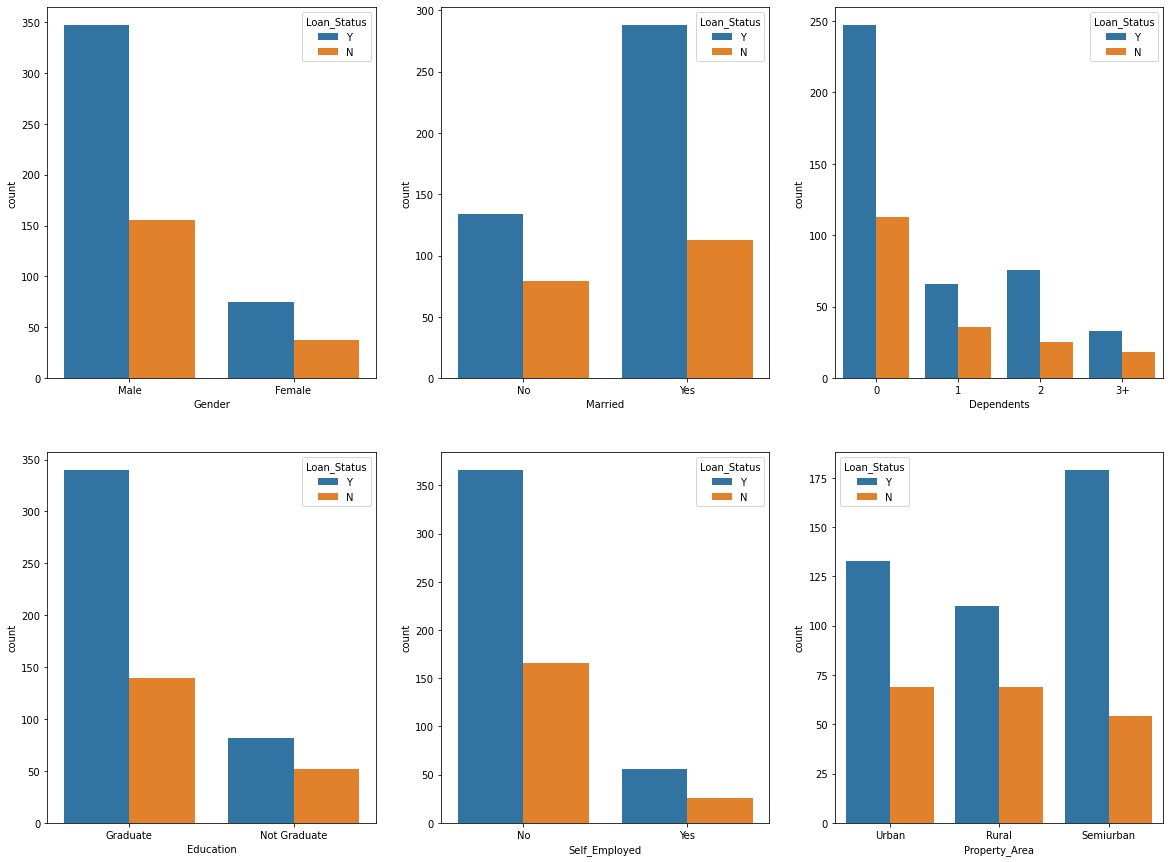

In [12]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sb.countplot(A.Gender,hue=A.Loan_Status)

plt.subplot(2,3,2)
sb.countplot(A.Married,hue=A.Loan_Status)

plt.subplot(2,3,3)
sb.countplot(A.Dependents,hue=A.Loan_Status)

plt.subplot(2,3,4)
sb.countplot(A.Education,hue=A.Loan_Status)

plt.subplot(2,3,5)
sb.countplot(A.Self_Employed,hue=A.Loan_Status)

plt.subplot(2,3,6)
sb.countplot(A.Property_Area,hue=A.Loan_Status)


In [13]:
imp_cols = []
from PM8wd import ANOVA
for i in con:                                  # here Y(cat) and X(con),so will apply ANOVA/boxplot
    b = ANOVA(A,"Loan_Status",i)
    print("Loan_Status vs",i)
    print("Pval: ",b)

Loan_Status vs ApplicantIncome
Pval:  0.90252
Loan_Status vs CoapplicantIncome
Pval:  0.14239
Loan_Status vs LoanAmount
Pval:  0.36769
Loan_Status vs Loan_Amount_Term
Pval:  0.60396
Loan_Status vs Credit_History
Pval:  0.0


<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

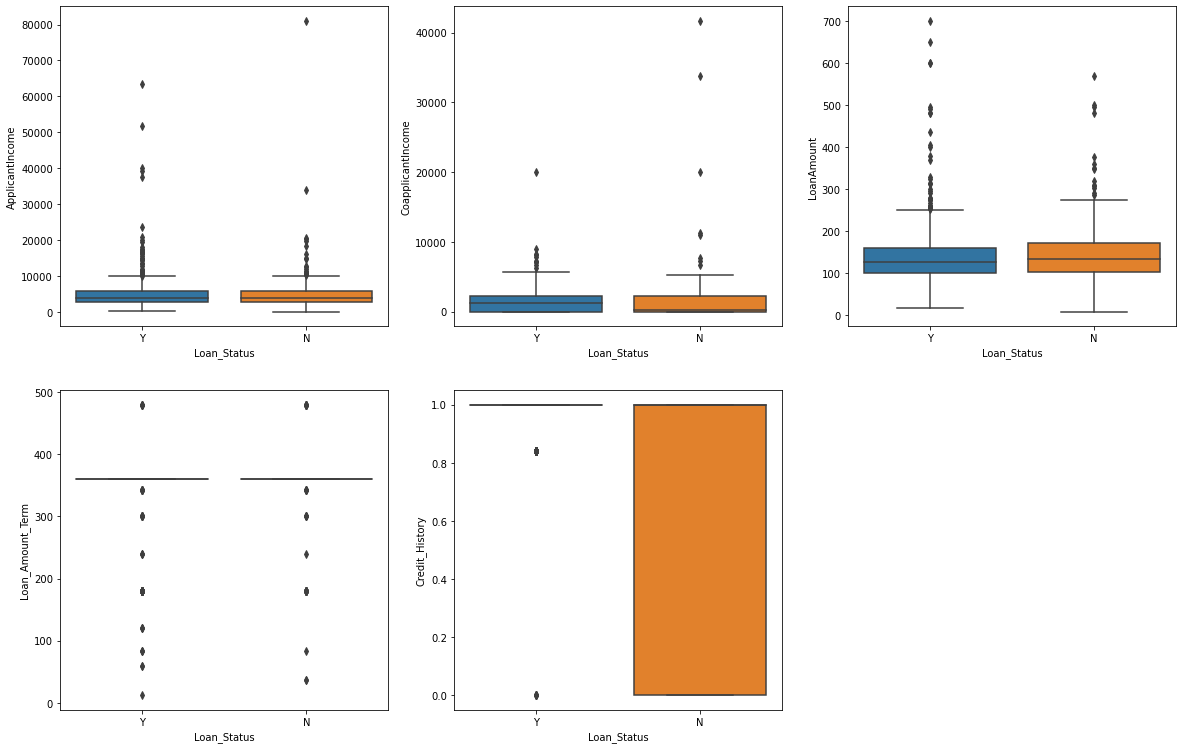

In [14]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sb.boxplot(A.Loan_Status,A.ApplicantIncome)

plt.subplot(3,3,2)
sb.boxplot(A.Loan_Status,A.CoapplicantIncome)

plt.subplot(3,3,3)
sb.boxplot(A.Loan_Status,A.LoanAmount)

plt.subplot(3,3,4)
sb.boxplot(A.Loan_Status,A.Loan_Amount_Term)

plt.subplot(3,3,5)
sb.boxplot(A.Loan_Status,A.Credit_History)

# Skew

In [15]:
X.skew()

ApplicantIncome      6.538870
CoapplicantIncome    7.492000
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

# Standardize the data

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

In [17]:
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072651,-0.554368,0.000000,0.279851,0.45164,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.000000,-0.038610,-0.219273,0.279851,0.45164,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,0.45164,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.462412,0.252103,-0.314547,0.279851,0.45164,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.097389,-0.554368,-0.064454,0.279851,0.45164,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


# Finding outliers

In [18]:
outliers = []
for i in con:
    outliers.extend(Xnew[(Xnew[i] > 3) | (Xnew[i] < -3)].index)    #  we find outliers grea than +3 and less than -3

Xnew = Xnew.drop(labels=outliers,axis=0)                           #here we dropped rows containing outliers.
Y = Y.drop(labels=outliers,axis=0)

In [19]:
outliers

[126,
 155,
 171,
 183,
 185,
 333,
 409,
 443,
 9,
 177,
 402,
 417,
 581,
 600,
 130,
 155,
 171,
 177,
 278,
 308,
 333,
 369,
 432,
 487,
 506,
 523,
 525,
 561,
 604,
 14,
 68,
 94,
 133,
 242,
 262,
 313,
 495,
 497,
 546,
 575,
 585]

In [20]:
Xnew.shape    # Rows and columns not containing outliers.

(577, 20)

In [21]:
Y.shape

(577, 1)

# Divide Data into training and testing split

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Model

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

In [24]:
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

In [25]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(ytrain,pred_tr),3))
print(round(accuracy_score(ytest,pred_ts),3))

0.811
0.836


Here model subjected overfitting so we will try tree model

# DTC

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [27]:
tr_acc

1.0

In [28]:
ts_acc

0.7241379310344828

Model subjected overfitting,so will make pruning

1.max_depth

In [29]:
tr = []
ts = []
for i in range(2,30,1):
    
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=i)
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    
    tr.append(tr_acc)
    ts.append(ts_acc)

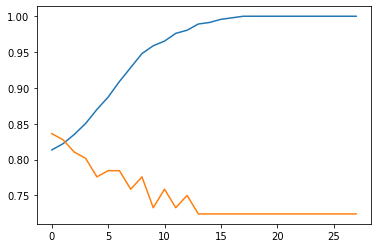

In [30]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

2.min_samples_leaf

In [31]:
tr = []
ts = []
for i in range(2,25,1):
    
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,min_samples_leaf=i)
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    
    tr.append(tr_acc)
    ts.append(ts_acc)

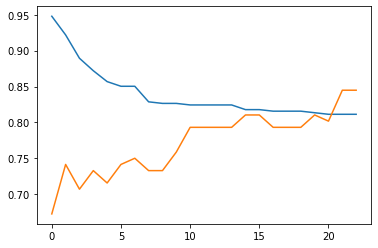

In [32]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

3.min_samples_split

In [33]:
tr = []
ts = []
for i in range(2,105,1):
    
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,min_samples_split=i)
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    
    tr.append(tr_acc)
    ts.append(ts_acc)

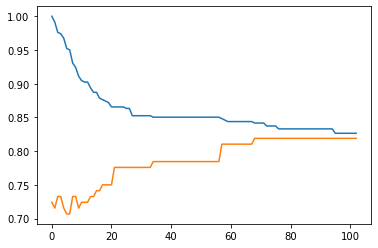

In [34]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

# Adaboost classifier

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=2)
abc = AdaBoostClassifier(dtc,n_estimators=50)
model = abc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [36]:
tr_acc

0.9848156182212582

In [37]:
ts_acc

0.7068965517241379

so model subjected overfitting

1.max_depth

In [38]:
tr = []
ts = []
for i in range(2,25,1):
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=i)
    abc = AdaBoostClassifier(dtc,n_estimators=50)
    model = abc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

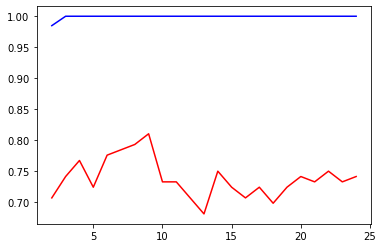

In [39]:
import matplotlib.pyplot as plt
plt.plot(range(2,25,1),tr,c="blue")
plt.plot(range(2,25,1),ts,c="red")

2.min_samples_leaf

In [40]:
tr = []
ts = []
for i in range(2,25,1):
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,min_samples_leaf=i)
    abc = AdaBoostClassifier(dtc,n_estimators=50)
    model = abc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

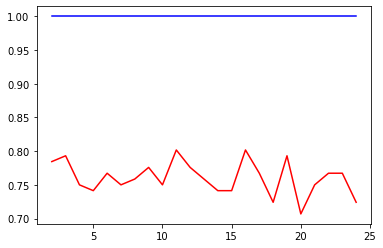

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(2,25,1),tr,c="blue")
plt.plot(range(2,25,1),ts,c="red")

3.min_samples_split

In [42]:
tr = []
ts = []
for i in range(2,25,1):
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,min_samples_split=i)
    abc = AdaBoostClassifier(dtc,n_estimators=50)
    model = abc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

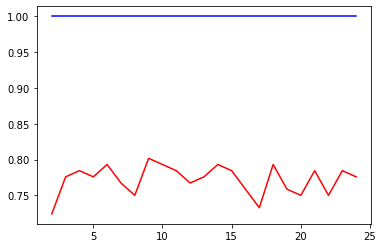

In [43]:
import matplotlib.pyplot as plt
plt.plot(range(2,25,1),tr,c="blue")
plt.plot(range(2,25,1),ts,c="red")

# Random Forest 

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=21,max_depth=2)
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),3)
ts_acc = round(accuracy_score(ytest,pred_ts),3)

In [45]:
tr_acc

0.805

In [46]:
ts_acc

0.819

1.max_depth

In [47]:
tr = []
ts = []
for i in range(2,20,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,max_depth=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

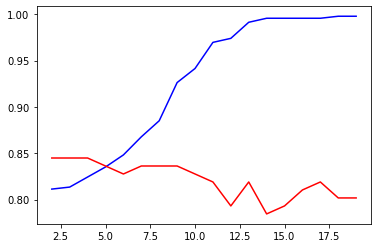

In [48]:
import matplotlib.pyplot as plt
plt.plot(range(2,20,1),tr,c="blue")
plt.plot(range(2,20,1),ts,c="red")

2.min_samples_leaf

In [49]:
tr = []
ts = []
for i in range(2,10,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_leaf=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

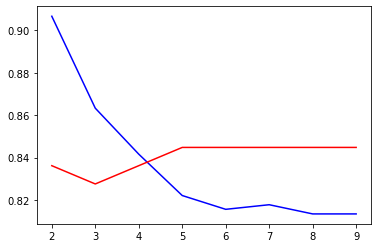

In [50]:
import matplotlib.pyplot as plt
plt.plot(range(2,10,1),tr,c="blue")
plt.plot(range(2,10,1),ts,c="red")

3.min_samples_split


In [51]:
tr = []
ts = []
for i in range(2,30,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_split=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

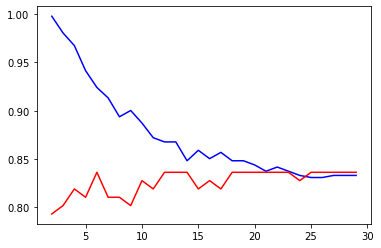

In [52]:
import matplotlib.pyplot as plt
plt.plot(range(2,30,1),tr,c="blue")
plt.plot(range(2,30,1),ts,c="red")

# Prediction on test data

In [53]:
import pandas as pd

B=pd.read_csv("C:/Users/Admin/Desktop/ETL class/machine learning/Projects/Loan project -2/testing_set.csv")

In [54]:
B

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


# missing data treatment

In [55]:
B.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [56]:
from PM8wd import replacer
replacer(B)

In [57]:
X = B.drop(labels=["Loan_ID"],axis=1)

# Divide data in categorical and continuous

In [58]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

# Standardize the data

In [59]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

In [60]:
Xnew.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.47918,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180807,0.270603,0.47918,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,-0.502774,0.418877,-0.593671,0.270603,0.00000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,-0.311909,-0.673335,-0.955139,0.270603,0.47918,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


# Finding outliers

In [61]:
outliers = []
for i in con:
    outliers.extend(Xnew[(Xnew[i] > 3) | (Xnew[i] < -3)].index)    #  we find outliers grea than +3 and less than -3

Xnew = Xnew.drop(labels=outliers,axis=0)                           #here we dropped rows containing outliers.


In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

In [63]:
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

In [64]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytrain,pred_tr))
print(confusion_matrix(ytest,pred_ts))

[[ 65  79]
 [  8 309]]
[[17 18]
 [ 1 80]]


In [65]:
pred_ts

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
      dtype=object)

In [66]:
pred_tr

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [67]:
W1 =pd.DataFrame(pred_tr)

In [68]:
W1.columns = ["Predicted_Loan_eligibility_status"]

In [69]:
W1

,Predicted_Loan_eligibility_status
0,Y
1,Y
2,Y
3,Y
4,Y
5,Y
6,Y
7,N
8,Y
9,Y


In [70]:
W1.to_csv("C:/Users/Admin/Desktop/ETL class/machine learning/Projects/Loan project -2/Solution/Self solution/new load prediction.csv")